# Paleopandas Playground

The goal of this notebook is to explore the uses of pandas within Pyleoclim, particularly since the implementation of non-nanosecond time resolutions that allow for geological and cosmological time scales to be represented within NumPy/Pandas (references needed)

In [1]:
%load_ext autoreload
%load_ext watermark
%autoreload 2

import pandas as pd; 
import pyleoclim as pyleo; 
import datetime
import numpy

Pandas 2.0.0.dev0+1147.g7cb7592523
Pyleoclim 1.0.0ba


## Series creation:

We start by creating a series, reading values from a CSV file and adding metadata manually:

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Time [years CE]', ylabel='SOI [mb]'>)

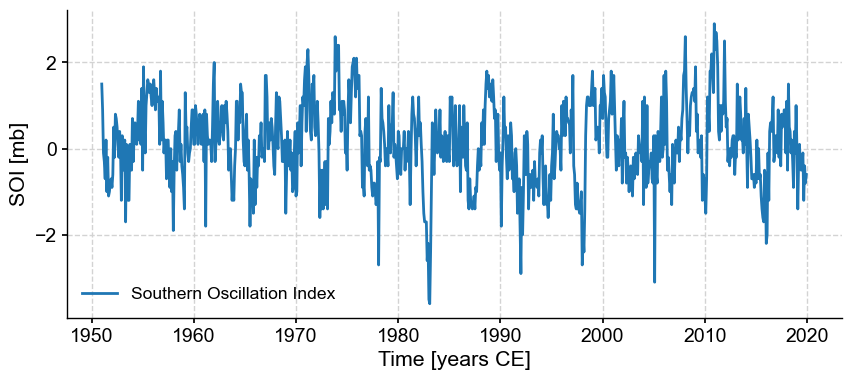

In [3]:
data=pd.read_csv(
    "../example_data/soi_data.csv",
    skiprows=0, header=1
)
time=data.iloc[:,1]
value=data.iloc[:,2]

darwin_lon = 130.8444
darwin_lat = -12.4637
tahiti_lon = 149.4260
tahiti_lat = -17.6509 
# compute centroid : https://stackoverflow.com/a/38201499


ts=pyleo.Series(
    time=time, value=value,
    time_name="Time", time_unit='years CE',
    value_name="SOI", value_unit = 'mb',
    label="Southern Oscillation Index", 
)
ts.plot()

New properties attached to `pyleo.Series` objects:
1. a pandas datetime_index:

In [24]:
ts.datetime_index

DatetimeIndex(['1951-01-01 00:00:00', '1951-01-31 10:29:49',
               '1951-03-02 21:00:10', '1951-04-02 07:30:00',
               '1951-05-02 17:59:49', '1951-06-02 04:30:10',
               '1951-07-02 15:00:00', '1951-08-02 01:29:49',
               '1951-09-01 12:00:10', '1951-10-01 22:30:00',
               ...
               '2019-03-02 21:00:10', '2019-04-02 07:30:00',
               '2019-05-02 17:59:49', '2019-06-02 04:30:10',
               '2019-07-02 15:00:00', '2019-08-02 01:29:49',
               '2019-09-01 12:00:10', '2019-10-01 22:30:00',
               '2019-11-01 08:59:49', '2019-12-01 19:30:10'],
              dtype='datetime64[s]', name='Time', length=828, freq=None)

2. a dictionary bundling all the metadata:

In [25]:
ts.metadata

{'time_unit': 'years CE',
 'value_unit': 'mb',
 'label': 'Southern Oscillation Index',
 'lat': None,
 'lon': None,
 'dataset_name': None,
 'log': ({0: 'clean_ts', 'applied': True, 'verbose': False},)}

In [34]:
ts

{'time_unit': 'years CE', 'time_name': 'Time', 'value_unit': 'mb', 'value_name': 'SOI', 'label': 'Southern Oscillation Index', 'lat': 0, 'lon': 0, 'dataset_name': None, 'log': ({0: 'clean_ts', 'applied': True, 'verbose': False},)}
Time
1951-01-01 00:00:00    1.5
1951-01-31 10:29:49    0.9
1951-03-02 21:00:10   -0.1
1951-04-02 07:30:00   -0.3
1951-05-02 17:59:49   -0.7
                      ... 
2019-08-02 01:29:49   -0.1
2019-09-01 12:00:10   -1.2
2019-10-01 22:30:00   -0.4
2019-11-01 08:59:49   -0.8
2019-12-01 19:30:10   -0.6
Name: SOI, Length: 828, dtype: float64

 **Request**: can we have a method called `disp()`, which will pretty-print the `pandas.Series` head() and the metadata?

## from_pandas()

We can also create this object from a Pandas Series. `data` is a pandas DataFrame, but its index is not currently a datetime index:

In [4]:
data.head()

,Date,Year,Value
0,195101,1951.000000,1.5
1,195102,1951.083333,0.9
2,195103,1951.166667,-0.1
3,195104,1951.250000,-0.3
4,195105,1951.333333,-0.7


Let's generate this index by hand:   (unless there is a better way)

In [12]:
index = pd.date_range('15-01-1951',periods=len(time), freq='M') # dtype is datetime64[ns]
idx = index.astype(dtype='datetime64[s]') # impose a datetime64[s] to test things out for paleo applications

In [22]:
#SOI_series = pd.Series(data=value, index=idx, name = 'SOI') # why isn't this working?
SOI_series = pd.Series(data=value.set_axis(idx), name = 'SOI')
SOI_series

1951-01-31    1.5
1951-02-28    0.9
1951-03-31   -0.1
1951-04-30   -0.3
1951-05-31   -0.7
             ... 
2019-08-31   -0.1
2019-09-30   -1.2
2019-10-31   -0.4
2019-11-30   -0.8
2019-12-31   -0.6
Name: SOI, Length: 828, dtype: float64

In [20]:
ts.metadata['time_name']

'Time'

In [30]:
SOI_pd = pyleo.Series.from_pandas(ser=SOI_series, metadata=ts.metadata)
SOI_pd.plot()

TypeError: pyleoclim.core.series.Series() got multiple values for keyword argument 'time_name'

We can see that all the data and metadata made it into the object, as they should.

## to_pandas()

conversely, one can export from pyleo.Series to a pandas Series:

In [28]:
pdts, metadata = ts.to_pandas() # might make sense to keep the metadata separate and return just the Series 
type(pdts) 

pandas.core.series.Series

## Unit conversions

This new version of Pyleoclim also features enhanced coversions betwen time representations:

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Time [yrs BP]', ylabel='SOI [mb]'>)

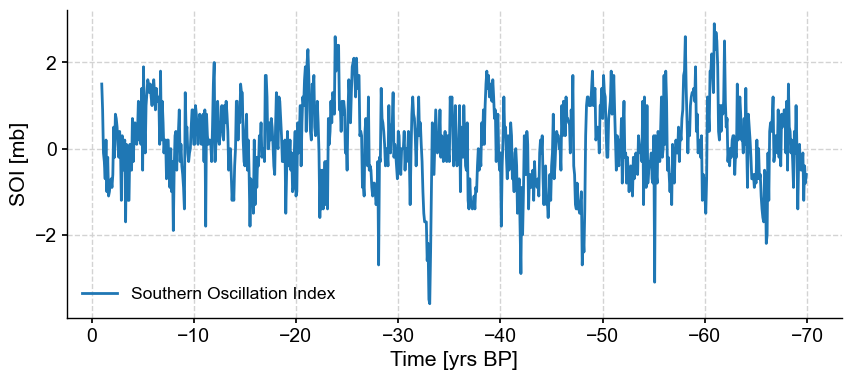

In [26]:
tsBP = ts.convert_time_unit('yrs BP')
tsBP.plot(invert_xaxis=True) # by default, plots represent values in increasing order, so we reverse the x-axis

In [4]:
tsBP.datetime_index

DatetimeIndex(['2019-12-01 19:30:10', '2019-11-01 08:59:49',
               '2019-10-01 22:30:00', '2019-09-01 12:00:10',
               '2019-08-02 01:29:49', '2019-07-02 15:00:00',
               '2019-06-02 04:30:10', '2019-05-02 17:59:49',
               '2019-04-02 07:30:00', '2019-03-02 21:00:10',
               ...
               '1951-10-01 22:30:00', '1951-09-01 12:00:10',
               '1951-08-02 01:29:49', '1951-07-02 15:00:00',
               '1951-06-02 04:30:10', '1951-05-02 17:59:49',
               '1951-04-02 07:30:00', '1951-03-02 21:00:10',
               '1951-01-31 10:29:49', '1951-01-01 00:00:00'],
              dtype='datetime64[s]', name='Time', length=828, freq=None)

Notice how the datetime index is unchanged by the time unit conversion: no matter what the units, the timestamps are fixed and absolute. `ts.time` is the only thing that does change, and is used for display purposes. 

## Resampling

Let's use [resample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) to obtain yearly averages:

<AxesSubplot: xlabel='Time [years CE]', ylabel='SOI [mb]'>

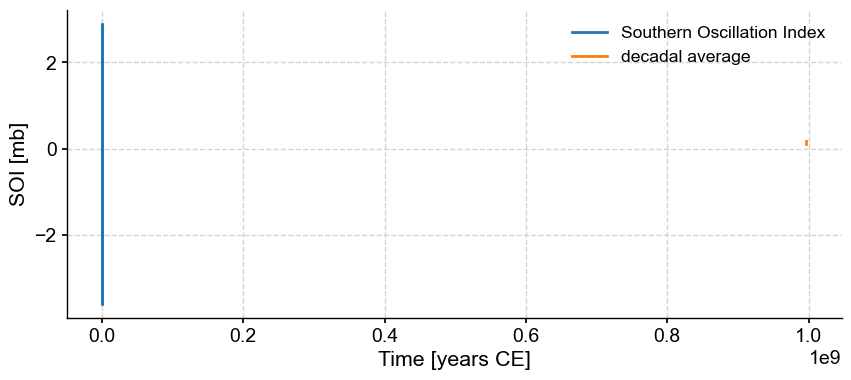

In [66]:
ts10 = ts.pandas_method(lambda x: x.resample('Y').mean())
ts10.label = 'decadal average'
fig, ax = ts.plot()
ts10.plot(ax=ax)

In [9]:
ts10.time

array([9.96579656e+08, 9.96579657e+08])

This is a known issue:  https://github.com/pandas-dev/pandas/issues/50656

In [33]:
%watermark -n -u -v -iv -w

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Tue Jan 17 2023

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.7.0

pandas   : 2.0.0.dev0+1147.g7cb7592523
pyleoclim: 1.0.0ba
numpy    : 1.23.5

Watermark: 2.3.1

